## Mapping Matrices

$$ Base Forecast :\hat{y}_h, $$ where h is the forecast horizon.

So all coherent forecasting approaches for either hierarchical or grouped structures can be represented as $$\tilde{y}_h = SG\hat{y}_h$$, 
where G is a matrix that maps the base forecasts into the bottom level and the summing matrix S sums these up using thr aggregation structure to produe a set of coherent forecats $$\tilde{y}_h$$

### Summing Matrice
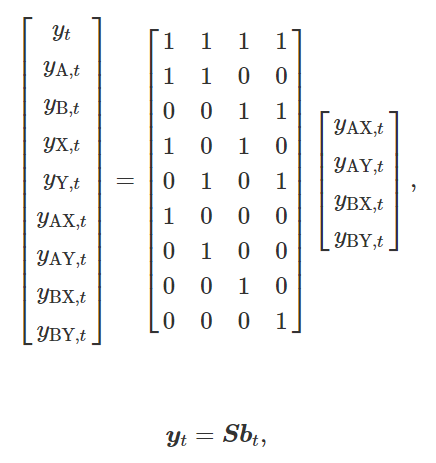

#### Mapping Matrice For Bottom-Up Approach
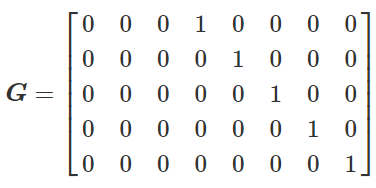
#### Mapping Matrice For Top-Down Approach
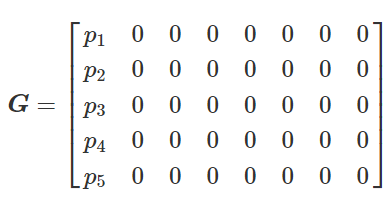
The first column includes the set of proportions that distribute the base forecasts of the top level to the bottom level. These are them summed up by the S matrix.

For a middle out approach, the G matrix will be a combination of the above two. Using a set of proportions, the base forecasts of some pre-chosen level will be disaggregated to the bottom level, all other base forecasts will be zeroed out, and the bottom-level forecasts will then be summed up the hierarchy via the summing matrix.

We can find the optimal G matrix to give the most accurate reconciled forecats.

## The MinT optimal reconciliation approach

Optimal G matrix : That minimises the total forecast variance of the set of coherent forecasts. If the base forecasts $\hat{y}_h$ are unbiased then the coherent forecasts $\tilde{y}_h$ will be unbiases provided $SGS = S$ and this provides a constraint on the matrix G.

Next we need to find the errors in our forecasts. The variance-covariance matrix of the h-step-ahead coherent forecast errors is given by $$V_h = Var[y_{T+h} - \tilde{y}_h] = SGW_hG^{'}S^{'}$$ where $W_h = Var[y_{T+h} - \tilde{y}_h]$ is the variance-covariance matrix of the corresponding base forecast errors.

The objective is to find a matrix G that minimises the error variances of the coherent forecasts. These error variances are on the diagonal of the matrix $V_h$ so the sum of all the error variances is given by the trace of the matrix $V_h$. 
The matrix G which minimises the trace of $V_h$ such that $SGS = S$ is given by $ \tilde{y}_h = S(S^{'}W_h^{-1}S)^{-1}S^{'}W_h^{-1}\hat{y}_h$

To us this in practive, we need to estimate W_h, the forecast error variance of the h-step-ahead base forecasts. This can be difficult, and so we provide four simplifying approximations that have been shown to work well in both simulations and in practice.

1. Set $W_h = k_h I$ for all h, where $k_h > 0$. This is the most simplifying assumption to make, and means that G is independent of the data. Setting  $W_h = k_h I$ in $ \tilde{y}_h = S(S^{'}W_h^{-1}S)^{-1}S^{'}W_h^{-1}\hat{y}_h$ gives the ordinary least squares (OLS) estimator.This approach is usually referred to as OLS reconciliation. 

2. Set $W_h = k_hdiag(\hat{W}_1)$ for all h where $k_h > 0$, $$\hat{W}_1 = \frac{1}{T}\sum^T_{t=1}e_te^{'}_t$$ and $e_t$ is an n-dimensional vector of residuals of the models that generated the base forecasts stacked in the same order as the data.

3. Set $W_h = k_h \Lambda$ for all h, where $k_h > 0, $\Lambda = diag(S_1),$$ and 1 is a unit vector of dimension m(the number of bottom-level series). This specification assumes that the bottom-level bse forecast errors each have variance $k_h$ and are uncorrelated between nodes. Hence ach element of the diagonal $\Lambda$ matrix contains the number of forecast error variances contributing to each node. This stimator only depends on the structure of the aggregations, and not on the actual data. It is therefore referred to as structural scaling.

4. Set $W_h = k_h W_1$ for all h, where $k_h$ > 0. Here we only assume that the error covariance matrices are proportional to each other, and we directly estimate the full one-step covariance matrix W1. The most obvious and simple way would be to use the sample covariance.

However, for cases where the number of bottom-level series m is large compared to the length of the series T, this is not a good estimator.Instead we use a shrinkage estimator which shrinks the sample covariance to a diagonal matrix. This is implemented in min_trace() by setting method = "mint_shrink".